# Identity

IA que permite desbloquear una vista si se le muestra la persona correcta.

# Temas a tratar

* SVMs
* Estrategias de clasificación multiclase
* Kernels
* Visión por computadora
* PCA
* Tuning con GridSearch y CrossValidation

# Objetivo

Desarrollar un modelo de inteligencia artificial (IA) llamado Identity que, dado una imagen de una persona identifique quién es y si es la persona adecuada desbloquee el dispositivo.

# Problema

Proteger un dispositivo es demasiado complicado y tedioso. La introducción de pines, patrones o la mala calidad de los sensores de huellas hacen que una tarea tan sencilla como desbloquear una pantalla sea muy complicado.

# Solución Propuesta

Ante esto se propone crear un mecanismo de desbloqueo facial que simplifique el proceso y de accesso a la persona adecuada de acuerdo a sus características faciales.

# Desarrollo

## Recopilación de datos

Para identificar entre personas hay varias formas de entrenar un modelo. Para mostrar un ejemplo, usaremos uno de los datasets de ejemplo de sklearn.

In [ ]:
from sklearn.datasets import fetch_lfw_people

# Descargamos al menos 80 imágenes por persona
face_images = fetch_lfw_people(min_faces_per_person=80)

## Análisis y preprocesamiento de datos

### Análisis de datos

Vemos qué es face_images

In [ ]:
print(face_images)

print(face_images.keys())

{'data': array([[0.32026145, 0.34771243, 0.26013073, ..., 0.4       , 0.5542484 ,
        0.82483655],
       [0.21045752, 0.18954249, 0.27189544, ..., 0.9281046 , 0.89673203,
        0.86928105],
       [0.14379086, 0.151634  , 0.16209151, ..., 0.3869281 , 0.2784314 ,
        0.23137255],
       ...,
       [0.8457516 , 0.83398694, 0.8091503 , ..., 0.57254905, 0.54509807,
        0.62614375],
       [0.37124184, 0.4627451 , 0.52287585, ..., 0.8679738 , 0.8392157 ,
        0.5124183 ],
       [0.13594772, 0.3124183 , 0.427451  , ..., 0.09411765, 0.14248367,
        0.08366013]], dtype=float32), 'images': array([[[0.32026145, 0.34771243, 0.26013073, ..., 0.4143791 ,
         0.39215687, 0.351634  ],
        [0.3503268 , 0.39346406, 0.18300654, ..., 0.4392157 ,
         0.40261438, 0.36862746],
        [0.3764706 , 0.3529412 , 0.20522876, ..., 0.33594772,
         0.39607844, 0.37254903],
        ...,
        [0.08104575, 0.09673203, 0.1254902 , ..., 0.39477125,
         0.38169935, 0.41

Es un diccionario con las imágenes de 62x47 en la clave `images`, mientras que la imagen reducida a una sola dimensión (array) en la clave `data`, una etiqueta numérica para identificar la persona de la que se trata `target`, y una representación humana con el nombre de la persona `target_name`.

In [ ]:
# Tomamos data
data = face_images['data']

# Tomamos target
targets = face_images['target']

# Tomamos las imágenes
images = face_images['images']

# Tomamos los sujetos
subjects = face_images['target_names']

print('Forma de data:', data.shape)
print('Forma de target:', targets.shape)
print('Forma de las imágenes:', images.shape)
print('Nombres de los sujetos disponibles', subjects)

Forma de data: (1140, 2914)
Forma de target: (1140,)
Forma de las imágenes: (1140, 62, 47)
Nombres de los sujetos disponibles ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


Tenemos 1140 imágenes pertenecientes a 5 sujetos relacionados con la política internacional allá por el 2005.

In [ ]:
# Contamos las imágenes por sujeto
for i in range(5):
  print(f'Tenemos {(targets == i).sum()} imágenes de {subjects[i]}')

Tenemos 236 imágenes de Colin Powell
Tenemos 121 imágenes de Donald Rumsfeld
Tenemos 530 imágenes de George W Bush
Tenemos 109 imágenes de Gerhard Schroeder
Tenemos 144 imágenes de Tony Blair


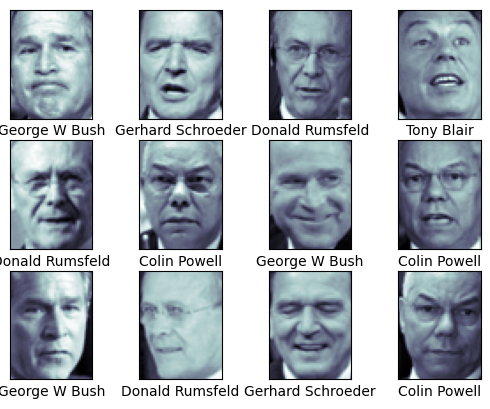

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    axi.imshow(images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=face_images.target_names[face_images.target[i]])

plt.show()

### Selección de entradas y salidas

Si nos gustaría identificar quién es cada quién, el modelo debería reconocer un rostro y decir su nombre, por lo que la salida debe ser `targets` donde tenemos la salida esperada para cada imagen.

Para las entradas tenemos `data` y `images`. Ambos con la misma información, pero con distinto formato. Mientras data es un solo array con un array de datos, images es un array de arrays de array de datos, una dimensión más que puede resultar incómoda para computar por el modelo que planeamos usar hoy, así que por esto se decide usar `data`

In [ ]:
# Definimos las entras y salidas

X = data
y = targets

### Preprocesamiento de los datos

`fetch_lfw_people` ya se encargó de lo más importante que es garantizar el balanceo de datos, que los tipos de datos sean consistentes, etc. Por lo que no hace falta preprocesar.

### Creación de conjuntos de pruebas y entrenamiento

In [ ]:
from sklearn.model_selection import train_test_split

# Hacemos el split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=42)

¡Listo! Ya podemos empezar a crear nuestro modelo

## Implementación y entrenamiento de modelos

## Selección de modelo

## Implementación y entrenamiento

In [ ]:
from sklearn.svm import SVC

# creamos el clasificador SVM
clf = SVC(class_weight='balanced', random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Seleccionamos los posibles hiperparámetros a probar para entrenar nuestro modelo
parameters = {'C': [0.1, 1, 10],
              'gamma': [1e-07, 1e-08, 1e-06],
              'kernel' : ['rbf', 'linear'] }

# Creamos una búsqueda en permutación de hiperparámetros
grid_search = GridSearchCV(clf, parameters, n_jobs=-1, cv=5)

# entrenamos con los distintas permutaciones de hiperparámetros
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1e-07, 1e-08, 1e-06],
                         'kernel': ['rbf', 'linear']})

## Análisis de resultados

In [ ]:
# Obtenemos el modelo que obtuvo el mejor resultado
best_clf = grid_search.best_estimator_

print(f'La exactitud del mejor es: {best_clf.score(X_test, Y_test)*100:.1f}%')
print(f'Los mejores parámetros son: {grid_search.best_params_}')

La exactitud del mejor es: 87.7%
Los mejores parámetros son: {'C': 1, 'gamma': 1e-07, 'kernel': 'linear'}


In [ ]:
from sklearn.metrics import classification_report

pred = best_clf.predict(X_test)

print(classification_report(Y_test, pred, target_names=subjects))

                   precision    recall  f1-score   support

     Colin Powell       0.89      0.88      0.88        64
  Donald Rumsfeld       0.89      0.78      0.83        32
    George W Bush       0.87      0.91      0.89       127
Gerhard Schroeder       0.89      0.86      0.88        29
       Tony Blair       0.88      0.85      0.86        33

         accuracy                           0.88       285
        macro avg       0.88      0.86      0.87       285
     weighted avg       0.88      0.88      0.88       285



In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC

pca = PCA(n_components=100, whiten=True, random_state=42)
svc = SVC(class_weight='balanced', kernel='rbf', random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

model = Pipeline([('pca', pca),
                  ('svc', svc)])

parameters_pipeline = {
    'svc__C': [1, 3, 10],
                       'svc__gamma': [0.0005, 0.001, 0.005]}
grid_search = GridSearchCV(model, parameters_pipeline)
grid_search.fit(X_train, Y_train)

GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=100, random_state=42,
                                            whiten=True)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             param_grid={'svc__C': [1, 3, 10],
                         'svc__gamma': [0.0005, 0.001, 0.005]})

In [ ]:
# Obtenemos el modelo que obtuvo el mejor resultado
best_clf = grid_search.best_estimator_

print(f'La exactitud del mejor es: {best_clf.score(X_test, Y_test)*100:.1f}%')

La exactitud del mejor es: 89.5%


In [ ]:
from sklearn.metrics import classification_report
pred = best_clf.predict(X_test)

print(classification_report(Y_test, pred, target_names=subjects))

                   precision    recall  f1-score   support

     Colin Powell       0.91      0.91      0.91        64
  Donald Rumsfeld       0.79      0.84      0.82        32
    George W Bush       0.93      0.94      0.93       127
Gerhard Schroeder       0.86      0.83      0.84        29
       Tony Blair       0.87      0.82      0.84        33

         accuracy                           0.89       285
        macro avg       0.87      0.87      0.87       285
     weighted avg       0.90      0.89      0.89       285



# Despliegue

In [ ]:
!rm -rf test_images

In [ ]:
import matplotlib.pyplot as plt
# Create a directory to store the images
!mkdir test_images

# Save each image in the directory
for i, image in enumerate(X_test):
  image = image.reshape(62, 47)
  if pred[i] == y[i]:
    plt.imsave(f'test_images/image_{subjects[pred[i]]}_{i}.png', image, cmap='gray')

In [ ]:
# Descarga imagen de internet con python

import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
from urllib.request import urlopen
import numpy as np


def download_image(url: str):
  # Send a GET request to the URL
  response = requests.get(url)

  # Check if the request was successful
  if response.status_code == 200:
      # Read the image data from the response
      image_data = response.content

      # Create an image object from the data
      image = Image.open(BytesIO(image_data)).convert('L')

      image = image.resize((62, 47))

      data = np.array(image.getdata())/255

      # Return the data of the image
      return data
  else:
      print("Failed to download the image.", response.status_code)

In [ ]:
position_mapper = {
    'Colin Powell': 'Secretario de Estado',
    'Donald Rumsfeld': 'Scretario de Defensa',
    'George W Bush': 'Presidente',
    'Gerhard Schroeder': 'Canciller Alemán',
    'Tony Blair': 'Primer ministro Británico'
}

def identify(image_data):
  target = best_clf.predict([image_data])[0]
  subject = subjects[target]

  return {
      'name': subject,
      'position': position_mapper[subject]
  }


In [ ]:
!pip install --ignore-installed Flask==3.0.0 pyngrok==7.1.2
ngrok_key = "Coloca tu token de ngrok aquí"
port = 5000

from pyngrok import ngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.5/705.5 kB 4.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is 

In [ ]:
ngrok.set_auth_token(ngrok_key)
ngrok.connect(port)

<NgrokTunnel: "https://3e5b-34-28-29-6.ngrok-free.app" -> "http://localhost:5000">

In [ ]:
from IPython.display import IFrame
IFrame(src="https://projects.rolandoandrade.me/identity/", width=500, height=500)

In [ ]:
from flask import Flask, request, jsonify, Response
import json

app = Flask(__name__)

@app.route("/")
def hello():
  image_url = request.args.get('image_url')
  data = download_image(image_url)
  response = identify(data)
  return Response(json.dumps(response), headers=[('Access-Control-Allow-Origin', '*')])

if __name__ == '__main__':
    app.run(port = port)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 9, in hello
    data = download_image(image_url)
  File "<ipython-input-18-4f100dc12784>", line 21, in downloa

Failed to download the image. 404


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = identify(data)
  File "<ipython-input-19-78f539e0d4e5>", line 10, in identify
    target = best_clf.predict([image_data])[0]
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dis

Failed to download the image. 404
Failed to download the image. 404


INFO:werkzeug:127.0.0.1 - - [29/Apr/2024 12:30:04] "GET /?image_url=https://projects.rolandoandrade.me/identity/Bush2.png HTTP/1.1" 200 -
ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = identify(data)
  File "<ipython-input-19-78f539e0d4e5>", line 10, in identify
    target = best_clf.predict([image_data])[0]
  File "/usr/local/lib/

Failed to download the image. 404


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = identify(data)
  File "<ipython-input-19-78f539e0d4e5>", line 10, in identify
    target = best_clf.predict([image_data])[0]
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dis

Failed to download the image. 404
Failed to download the image. 404


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = identify(data)
  File "<ipython-input-19-78f539e0d4e5>", line 10, in identify
    target = best_clf.predict([image_data])[0]
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dis

Failed to download the image. 404
Failed to download the image. 404


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = identify(data)
  File "<ipython-input-19-78f539e0d4e5>", line 10, in identify
    target = best_clf.predict([image_data])[0]
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dis

Failed to download the image. 404


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = identify(data)
  File "<ipython-input-19-78f539e0d4e5>", line 10, in identify
    target = best_clf.predict([image_data])[0]
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dis

Failed to download the image. 404
Failed to download the image. 404


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = identify(data)
  File "<ipython-input-19-78f539e0d4e5>", line 10, in identify
    target = best_clf.predict([image_data])[0]
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dis

Failed to download the image. 404
Failed to download the image. 404
Failed to download the image. 404


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = identify(data)
  File "<ipython-input-19-78f539e0d4e5>", line 10, in identify
    target = best_clf.predict([image_data])[0]
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dis

Failed to download the image. 404
Failed to download the image. 404


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = identify(data)
  File "<ipython-input-19-78f539e0d4e5>", line 10, in identify
    target = best_clf.predict([image_data])[0]
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dis

Failed to download the image. 404
Failed to download the image. 404


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = identify(data)
  File "<ipython-input-19-78f539e0d4e5>", line 10, in identify
    target = best_clf.predict([image_data])[0]
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dis

Failed to download the image. 404


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = identify(data)
  File "<ipython-input-19-78f539e0d4e5>", line 10, in identify
    target = best_clf.predict([image_data])[0]
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dis

Failed to download the image. 404


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = identify(data)
  File "<ipython-input-19-78f539e0d4e5>", line 10, in identify
    target = best_clf.predict([image_data])[0]
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dis

Failed to download the image. 404
Failed to download the image. 404


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = identify(data)
  File "<ipython-input-19-78f539e0d4e5>", line 10, in identify
    target = best_clf.predict([image_data])[0]
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dis

Failed to download the image. 404


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = identify(data)
  File "<ipython-input-19-78f539e0d4e5>", line 10, in identify
    target = best_clf.predict([image_data])[0]
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dis

Failed to download the image. 404
Failed to download the image. 404


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = identify(data)
  File "<ipython-input-19-78f539e0d4e5>", line 10, in identify
    target = best_clf.predict([image_data])[0]
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dis

Failed to download the image. 404


INFO:werkzeug:127.0.0.1 - - [29/Apr/2024 12:30:28] "GET /?image_url=https://projects.rolandoandrade.me/identity/Schroeder.png HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Apr/2024 12:30:35] "GET /?image_url=https://projects.rolandoandrade.me/identity/Rumsfeld.png HTTP/1.1" 200 -
ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = ide

Failed to download the image. 404


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = identify(data)
  File "<ipython-input-19-78f539e0d4e5>", line 10, in identify
    target = best_clf.predict([image_data])[0]
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dis

Failed to download the image. 404
Failed to download the image. 404


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = identify(data)
  File "<ipython-input-19-78f539e0d4e5>", line 10, in identify
    target = best_clf.predict([image_data])[0]
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dis

Failed to download the image. 404
Failed to download the image. 404


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = identify(data)
  File "<ipython-input-19-78f539e0d4e5>", line 10, in identify
    target = best_clf.predict([image_data])[0]
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dis

Failed to download the image. 404
Failed to download the image. 404


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = identify(data)
  File "<ipython-input-19-78f539e0d4e5>", line 10, in identify
    target = best_clf.predict([image_data])[0]
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dis

Failed to download the image. 404
Failed to download the image. 404


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = identify(data)
  File "<ipython-input-19-78f539e0d4e5>", line 10, in identify
    target = best_clf.predict([image_data])[0]
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dis

Failed to download the image. 404
Failed to download the image. 404


INFO:werkzeug:127.0.0.1 - - [29/Apr/2024 12:30:49] "GET /?image_url=https://projects.rolandoandrade.me/identity/Bush.png HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Apr/2024 12:30:49] "GET /?image_url=https://projects.rolandoandrade.me/identity/Bush2.png HTTP/1.1" 200 -
ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = identify(da

Failed to download the image. 404


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = identify(data)
  File "<ipython-input-19-78f539e0d4e5>", line 10, in identify
    target = best_clf.predict([image_data])[0]
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dis

Failed to download the image. 404
Failed to download the image. 404


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = identify(data)
  File "<ipython-input-19-78f539e0d4e5>", line 10, in identify
    target = best_clf.predict([image_data])[0]
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dis

Failed to download the image. 404


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = identify(data)
  File "<ipython-input-19-78f539e0d4e5>", line 10, in identify
    target = best_clf.predict([image_data])[0]
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dis

Failed to download the image. 404


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = identify(data)
  File "<ipython-input-19-78f539e0d4e5>", line 10, in identify
    target = best_clf.predict([image_data])[0]
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dis

Failed to download the image. 404
Failed to download the image. 404


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = identify(data)
  File "<ipython-input-19-78f539e0d4e5>", line 10, in identify
    target = best_clf.predict([image_data])[0]
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dis

Failed to download the image. 404


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = identify(data)
  File "<ipython-input-19-78f539e0d4e5>", line 10, in identify
    target = best_clf.predict([image_data])[0]
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dis

Failed to download the image. 404
Failed to download the image. 404


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = identify(data)
  File "<ipython-input-19-78f539e0d4e5>", line 10, in identify
    target = best_clf.predict([image_data])[0]
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dis

Failed to download the image. 404
Failed to download the image. 404


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1455, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 869, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 867, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 852, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-23-7af591fabbb4>", line 10, in hello
    response = identify(data)
  File "<ipython-input-19-78f539e0d4e5>", line 10, in identify
    target = best_clf.predict([image_data])[0]
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dis

Failed to download the image. 404


# Conclusiones

# La verdadera solución

Las SVM son probablemente de los algoritmos de machine learning más importantes que han existido, siendo una herramienta muy potente para casi cualquier problema. No obstante, hoy en día existen modelos mucho más poderosos para la detección de rostros basados en redes convolucionales pues es un mecanismo más natural de entender la visión por computador, sin embargo, también son más pesados y complejos de llevar a sistemas de bajos recursos.

El modelo más popular para esta tarea a mi consideración es DeepFace.

# Tu Turno

Identifica cardipatías (normales, sospechosas, patológicas) utilizando el siguiente [dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/00193/CTG.xls).

Para ello, usa SVC con un kernel RBF y usando un GridSearch para evaluar:

```python
parameters = {
  'C': (100, 1e3, 1e4, 1e5),
  'gamma': (1e-08, 1e-7, 1e-6, 1e-5)
}
```